<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python57_groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


성별 팁의 평균

In [7]:
# 성별이 남성인 부분집합에서 팁 컬럼의 평균을 계산.
tip_male = tips[tips['sex'] == 'Male']['tip'].mean()
tip_male

3.0896178343949052

In [8]:
tip_female = tips[tips['sex'] == 'Female']['tip'].mean()
tip_female

2.833448275862069

In [9]:
pd.Series(data=[tip_male, tip_female], index=['Male', 'Female'])

Male      3.089618
Female    2.833448
dtype: float64

In [18]:
genders = tips['sex'].unique()  #> ['Female', 'Male']
tip_by_gender = []  # 성별 팁의 평균들을 저장할 리스트
for gender in genders:
    tip_mean = tips[tips['sex'] == gender]['tip'].mean()
    tip_by_gender.append(tip_mean)

s = pd.Series(data=tip_by_gender, index=genders)
s

Female    2.833448
Male      3.089618
dtype: float64

In [27]:
def group_by_mean(df, by, value):
    """데이터 프레임 df에서 컬럼(by)별 변수(value)의 평균을 계산해서 Series를 리턴"""
    categories = df[by].unique()
    value_by_cat = []
    for cat in categories:
        subset = df[df[by] == cat]  # split(데이터 프레임을 부분집합으로 "분리")
        mean = subset[value].mean()  # apply(각각의 부분집합에 통계 함수를 "적용")
        value_by_cat.append(mean)

    s = pd.Series(data=value_by_cat, index=categories)  # combine(결과를 하나로 "합침")
    
    return s

In [28]:
group_by_mean(df=tips, by='sex', value='tip')

Female    2.833448
Male      3.089618
dtype: float64

In [29]:
group_by_mean(df=tips, by='day', value='tip')

Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
dtype: float64

In [30]:
group_by_mean(df=tips, by='day', value='total_bill')

Sun     21.410000
Sat     20.441379
Thur    17.682742
Fri     17.151579
dtype: float64

성별 팁의 평균: pivot_table 함수 사용

In [31]:
tips.pivot_table(values='tip', index='sex', aggfunc=np.mean)
# pd.DataFrame을 리턴!

,tip
sex,
Male,3.089618
Female,2.833448


성별 팁의 평균: groupby 함수 사용

In [4]:
grouped = tips.groupby(by='sex')  # splitting
grouped

In [34]:
for x in grouped:
    print(x)  #> (by, subset)
    print('*' * 50, '\n')

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
************************************************** 

('Female',      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Fem

In [35]:
for by, subset in grouped:
    print('category:', by)
    print(subset)
    print('*' * 50, '\n')

category: Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
************************************************** 

category: Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83

In [36]:
# apply-combine
grouped['tip'].mean()  # pandas.Series 리턴.

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [37]:
tips.groupby('sex')['tip'].mean()  #> pandas.Series

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [7]:
tips.groupby('sex')[['tip']].mean()  #> pandas.DataFrame

,tip
sex,
Male,3.089618
Female,2.833448


In [5]:
# 성별 영수증금액, 팁의 평균
tips.groupby('sex')[['total_bill', 'tip']].mean()  #> pandas.DataFrame

,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [6]:
tips.pivot_table(values=['total_bill', 'tip'], index='sex', aggfunc=np.mean)

,tip,total_bill
sex,,
Male,3.089618,20.744076
Female,2.833448,18.056897


* 성별, 흡연여부별 팁의 평균

In [8]:
tips.pivot_table(values='tip', index='sex', columns='smoker')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [12]:
tips.pivot_table(values='tip', index='sex', columns='smoker').stack()
# stack: column -> MultiIndex

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
dtype: float64

In [13]:
tips.pivot_table(values='tip', index=['sex', 'smoker'])

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [10]:
tips.groupby(['sex', 'smoker'])[['tip']].mean()

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [14]:
# unstack: MultiIndex -> columns
tips.groupby(['sex', 'smoker'])[['tip']].mean().unstack()

tip          
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519

* 성별 팁의 최댓값

In [15]:
tips.pivot_table(values='tip', index='sex', aggfunc=np.max)

,tip
sex,
Male,10.0
Female,6.5


In [16]:
tips.groupby('sex')[['tip']].max()

,tip
sex,
Male,10.0
Female,6.5


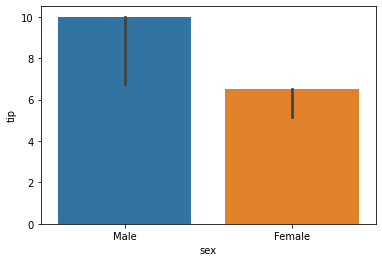

In [18]:
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max)
plt.show()

* 성별, 시간별 팁의 최솟값

In [19]:
tips.pivot_table(values='tip', index=['sex', 'time'], aggfunc=np.min)

tip
sex    time        
Male   Lunch   1.44
       Dinner  1.00
Female Lunch   1.25
       Dinner  1.00

In [20]:
tips.pivot_table(values='tip', index='sex', columns='time', aggfunc=np.min)

time,Lunch,Dinner
sex,,
Male,1.44,1.0
Female,1.25,1.0


In [22]:
tips.groupby(['sex', 'time'])[['tip']].min()

tip
sex    time        
Male   Lunch   1.44
       Dinner  1.00
Female Lunch   1.25
       Dinner  1.00

In [23]:
tips.groupby(['sex', 'time'])[['tip']].min().unstack()

tip       
time   Lunch Dinner
sex                
Male    1.44    1.0
Female  1.25    1.0

* 성별, 흡연여부별, 요일별 팁의 평균

In [24]:
tips.pivot_table(values='tip', index=['sex', 'smoker', 'day'])

tip
sex    smoker day           
Male   Yes    Thur  3.058000
              Fri   2.741250
              Sat   2.879259
              Sun   3.521333
       No     Thur  2.941500
              Fri   2.500000
              Sat   3.256563
              Sun   3.115349
Female Yes    Thur  2.990000
              Fri   2.682857
              Sat   2.868667
              Sun   3.500000
       No     Thur  2.459600
              Fri   3.125000
              Sat   2.724615
              Sun   3.329286

In [25]:
tips.pivot_table(values='tip', index=['sex', 'smoker'], columns='day')

day              Thur       Fri       Sat       Sun
sex    smoker                                      
Male   Yes     3.0580  2.741250  2.879259  3.521333
       No      2.9415  2.500000  3.256563  3.115349
Female Yes     2.9900  2.682857  2.868667  3.500000
       No      2.4596  3.125000  2.724615  3.329286

In [26]:
tips.pivot_table(values='tip', index='sex', columns=['smoker', 'day'])

smoker    Yes                                    No                           
day      Thur       Fri       Sat       Sun    Thur    Fri       Sat       Sun
sex                                                                           
Male    3.058  2.741250  2.879259  3.521333  2.9415  2.500  3.256563  3.115349
Female  2.990  2.682857  2.868667  3.500000  2.4596  3.125  2.724615  3.329286

In [27]:
tips.pivot_table(values='tip', index='sex', columns=['day', 'smoker'])

day      Thur               Fri              Sat                 Sun          
smoker    Yes      No       Yes     No       Yes        No       Yes        No
sex                                                                           
Male    3.058  2.9415  2.741250  2.500  2.879259  3.256563  3.521333  3.115349
Female  2.990  2.4596  2.682857  3.125  2.868667  2.724615  3.500000  3.329286

In [29]:
grouped = tips.groupby(['sex', 'smoker', 'day'])[['tip']].mean()
grouped

tip
sex    smoker day           
Male   Yes    Thur  3.058000
              Fri   2.741250
              Sat   2.879259
              Sun   3.521333
       No     Thur  2.941500
              Fri   2.500000
              Sat   3.256563
              Sun   3.115349
Female Yes    Thur  2.990000
              Fri   2.682857
              Sat   2.868667
              Sun   3.500000
       No     Thur  2.459600
              Fri   3.125000
              Sat   2.724615
              Sun   3.329286

In [31]:
# MultiIndex -> columns: unstack()
grouped.unstack()  #> 가장 마지막 level의 인덱스를 컬럼으로 변환.

tip                              
day              Thur       Fri       Sat       Sun
sex    smoker                                      
Male   Yes     3.0580  2.741250  2.879259  3.521333
       No      2.9415  2.500000  3.256563  3.115349
Female Yes     2.9900  2.682857  2.868667  3.500000
       No      2.4596  3.125000  2.724615  3.329286

In [32]:
grouped.unstack(level=[1, 2])

tip                                                                 
smoker    Yes                                    No                           
day      Thur       Fri       Sat       Sun    Thur    Fri       Sat       Sun
sex                                                                           
Male    3.058  2.741250  2.879259  3.521333  2.9415  2.500  3.256563  3.115349
Female  2.990  2.682857  2.868667  3.500000  2.4596  3.125  2.724615  3.329286

In [33]:
grouped.unstack(level=[2, 1])

tip                                                                 
day      Thur       Fri       Sat       Sun    Thur    Fri       Sat       Sun
smoker    Yes       Yes       Yes       Yes      No     No        No        No
sex                                                                           
Male    3.058  2.741250  2.879259  3.521333  2.9415  2.500  3.256563  3.115349
Female  2.990  2.682857  2.868667  3.500000  2.4596  3.125  2.724615  3.329286

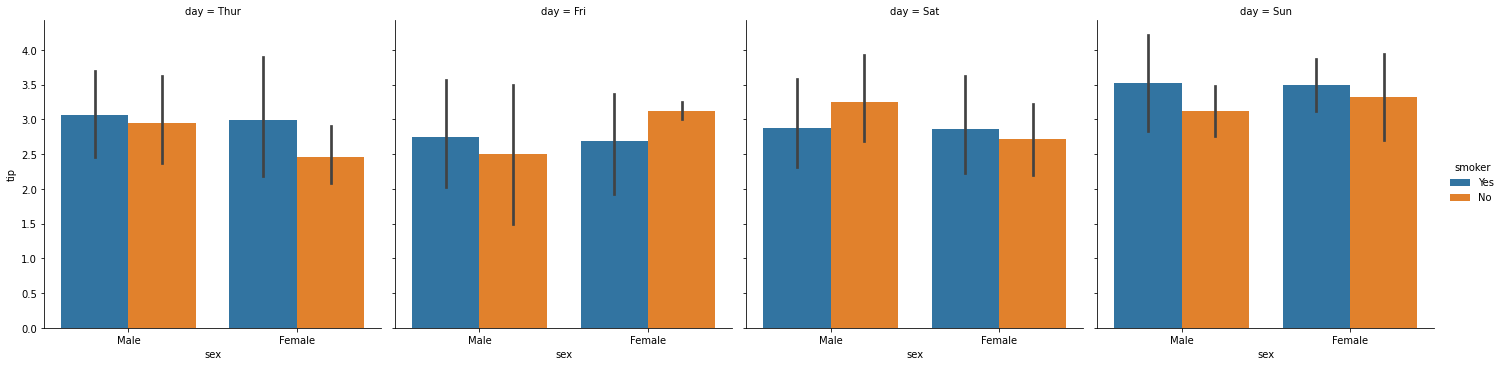

In [36]:
# 성별, 흡연여부별, 요일별 팁의 평균을 시각화
sns.catplot(x='sex', y='tip', hue='smoker', data=tips,
            col='day', kind='bar')
plt.show()

* 성별, 흡연여부별, 요일별, 시간별 팁의 평균 계산, 시각화

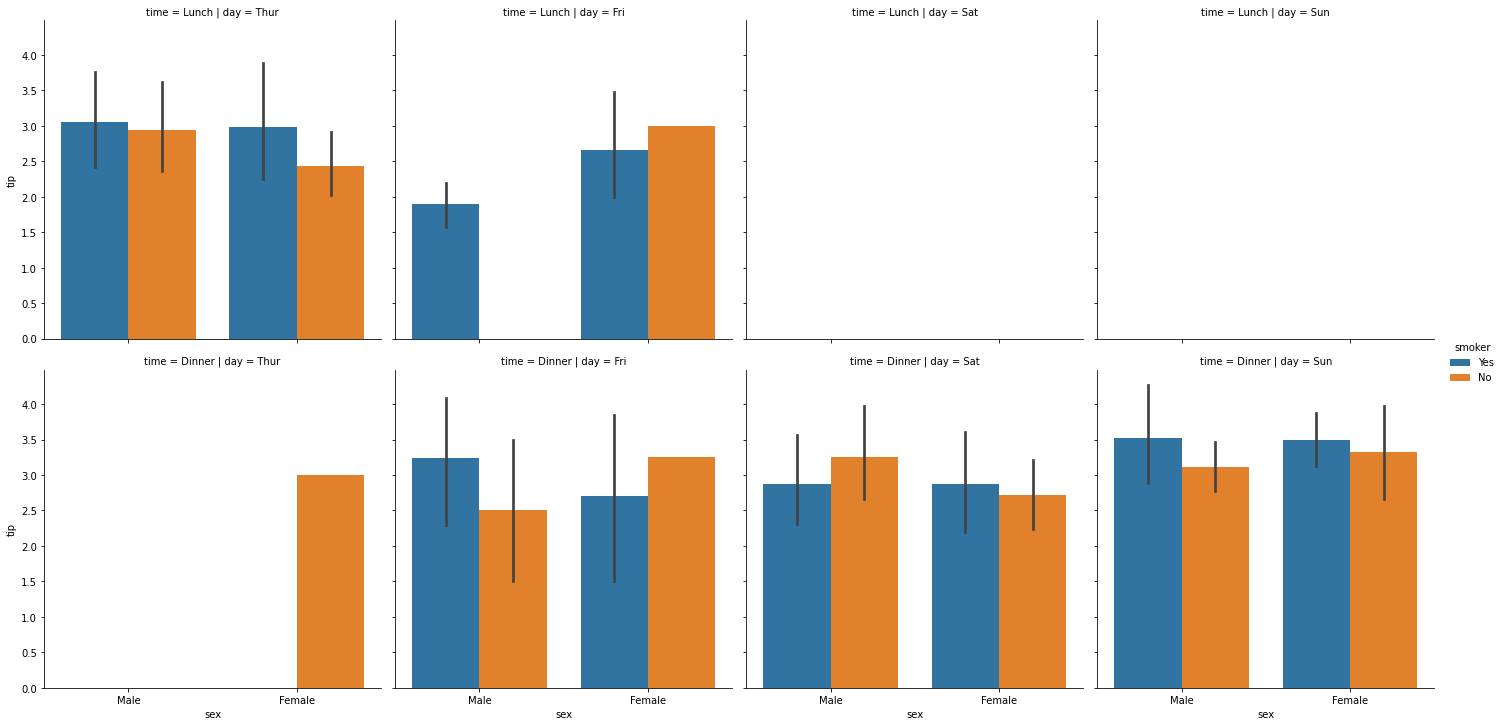

In [39]:
sns.catplot(x='sex', y='tip', hue='smoker', data=tips,
            col='day', row='time', kind='bar')
plt.show()

In [40]:
tips.pivot_table(values='tip', index=['sex', 'smoker'], columns=['day', 'time'])

day                Thur          Fri              Sat       Sun
time              Lunch Dinner Lunch Dinner    Dinner    Dinner
sex    smoker                                                  
Male   Yes     3.058000    NaN  1.90  3.246  2.879259  3.521333
       No      2.941500    NaN   NaN  2.500  3.256563  3.115349
Female Yes     2.990000    NaN  2.66  2.700  2.868667  3.500000
       No      2.437083    3.0  3.00  3.250  2.724615  3.329286

In [42]:
grouped = tips.groupby(['sex', 'smoker', 'day', 'time'])[['tip']].mean()
grouped

tip
sex    smoker day  time            
Male   Yes    Thur Lunch   3.058000
                   Dinner       NaN
              Fri  Lunch   1.900000
                   Dinner  3.246000
              Sat  Lunch        NaN
                   Dinner  2.879259
              Sun  Lunch        NaN
                   Dinner  3.521333
       No     Thur Lunch   2.941500
                   Dinner       NaN
              Fri  Lunch        NaN
                   Dinner  2.500000
              Sat  Lunch        NaN
                   Dinner  3.256563
              Sun  Lunch        NaN
                   Dinner  3.115349
Female Yes    Thur Lunch   2.990000
                   Dinner       NaN
              Fri  Lunch   2.660000
                   Dinner  2.700000
              Sat  Lunch        NaN
                   Dinner  2.868667
              Sun  Lunch        NaN
                   Dinner  3.500000
       No     Thur Lunch   2.437083
                   Dinner  3.000000
              Fri  Lunch   3.000000
                   Dinner  3.250000
              Sat  Lunch        NaN
                   Dinner  2.724615
              Sun  Lunch        NaN
                   Dinner  3.329286

In [43]:
grouped.unstack()  # level=-1: 가장 마지막 인덱스만 컬럼으로.

tip          
time                   Lunch    Dinner
sex    smoker day                     
Male   Yes    Thur  3.058000       NaN
              Fri   1.900000  3.246000
              Sat        NaN  2.879259
              Sun        NaN  3.521333
       No     Thur  2.941500       NaN
              Fri        NaN  2.500000
              Sat        NaN  3.256563
              Sun        NaN  3.115349
Female Yes    Thur  2.990000       NaN
              Fri   2.660000  2.700000
              Sat        NaN  2.868667
              Sun        NaN  3.500000
       No     Thur  2.437083  3.000000
              Fri   3.000000  3.250000
              Sat        NaN  2.724615
              Sun        NaN  3.329286

In [45]:
grouped.unstack(level=[-2, -1])  # level=[2, 3]

tip                                                    
day                Thur          Fri          Sat             Sun          
time              Lunch Dinner Lunch Dinner Lunch    Dinner Lunch    Dinner
sex    smoker                                                              
Male   Yes     3.058000    NaN  1.90  3.246   NaN  2.879259   NaN  3.521333
       No      2.941500    NaN   NaN  2.500   NaN  3.256563   NaN  3.115349
Female Yes     2.990000    NaN  2.66  2.700   NaN  2.868667   NaN  3.500000
       No      2.437083    3.0  3.00  3.250   NaN  2.724615   NaN  3.329286

* 성별, 시간별 영수증금액과 팁의 중앙값

In [46]:
tips.pivot_table(values=['total_bill', 'tip'], index=['sex', 'time'], aggfunc=np.median)

tip  total_bill
sex    time                    
Male   Lunch   2.31       16.58
       Dinner  3.00       19.63
Female Lunch   2.01       13.42
       Dinner  3.00       17.19

In [47]:
tips.pivot_table(values=['total_bill', 'tip'], index='sex', columns='time',
                 aggfunc=np.median)

tip        total_bill       
time   Lunch Dinner      Lunch Dinner
sex                                  
Male    2.31    3.0      16.58  19.63
Female  2.01    3.0      13.42  17.19

In [50]:
grouped = tips.groupby(['sex', 'time'])[['total_bill', 'tip']].median()
grouped

total_bill   tip
sex    time                    
Male   Lunch        16.58  2.31
       Dinner       19.63  3.00
Female Lunch        13.42  2.01
       Dinner       17.19  3.00

In [51]:
grouped.unstack()

total_bill          tip       
time        Lunch Dinner Lunch Dinner
sex                                  
Male        16.58  19.63  2.31    3.0
Female      13.42  17.19  2.01    3.0

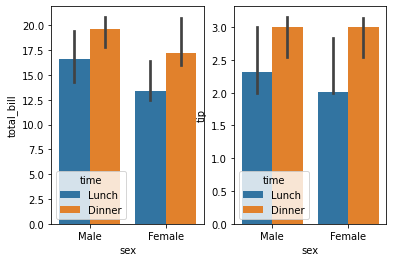

In [59]:
# 성별, 시간별 영수증금액과 팁의 중앙값 시각화
fig, ax = plt.subplots(ncols=2)
# print(fig)
# print(ax)
sns.barplot(x='sex', y='total_bill', hue='time', data=tips, 
            estimator=np.median, ax=ax[0])
sns.barplot(x='sex', y='tip', hue='time', data=tips, 
            estimator=np.median, ax=ax[1])
plt.show()

* 성별, 시간별 영수증금액의 최솟값과 최댓값

In [60]:
tips.pivot_table(values='total_bill', index=['sex', 'time'],
                 aggfunc=[np.min, np.max])

amin       amax
              total_bill total_bill
sex    time                        
Male   Lunch        7.51      41.19
       Dinner       7.25      50.81
Female Lunch        8.35      43.11
       Dinner       3.07      44.30

In [61]:
tips.pivot_table(values='total_bill', index='sex', columns='time',
                 aggfunc=[np.min, np.max])

amin          amax       
time   Lunch Dinner  Lunch Dinner
sex                              
Male    7.51   7.25  41.19  50.81
Female  8.35   3.07  43.11  44.30

In [67]:
grouped = tips.groupby(['sex', 'time'])[['total_bill']].aggregate([np.min, np.max])
grouped

total_bill       
                    amin   amax
sex    time                    
Male   Lunch        7.51  41.19
       Dinner       7.25  50.81
Female Lunch        8.35  43.11
       Dinner       3.07  44.30

In [68]:
grouped.unstack()

total_bill                     
             amin          amax       
time        Lunch Dinner  Lunch Dinner
sex                                   
Male         7.51   7.25  41.19  50.81
Female       8.35   3.07  43.11  44.30

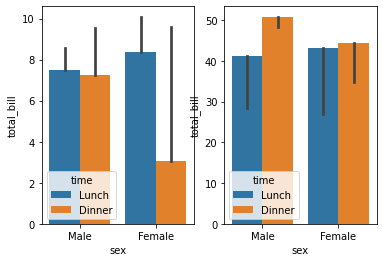

In [71]:
fig, axes = plt.subplots(ncols=2)

sns.barplot(x='sex', y='total_bill', hue='time', data=tips,
            estimator=np.min, ax=axes[0])
sns.barplot(x='sex', y='total_bill', hue='time', data=tips,
            estimator=np.max, ax=axes[1])

plt.show()